## Regresja liniowa - Zadanie 2
Korzystając z danych boston, przeprowadź analogiczną analizę - wybierz trzy najbardziej skorelowane zmienne objaśniające z targetem, a następnie zbuduj na nich model regresji liniowej. Sprawdź wyniki pomiaru błędu predykcji.

- Zmienna modelowana = target
- Zmienne objaśniające = atrybuty
- Błąd predykcji: Mean squared error

### Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated
- wykorzystujemy do tego macierz korelacji

In [1]:
#importing libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the dataset
data = datasets.load_boston()
# Zmienne objaśniające
df = pd.DataFrame(data.data, columns=data.feature_names)
# Zmienna objaśniana
# target = pd.DataFrame(data.target, columns=["MEDV"])
df["MEDV"] = data.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [6]:
df.head()
# X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [8]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


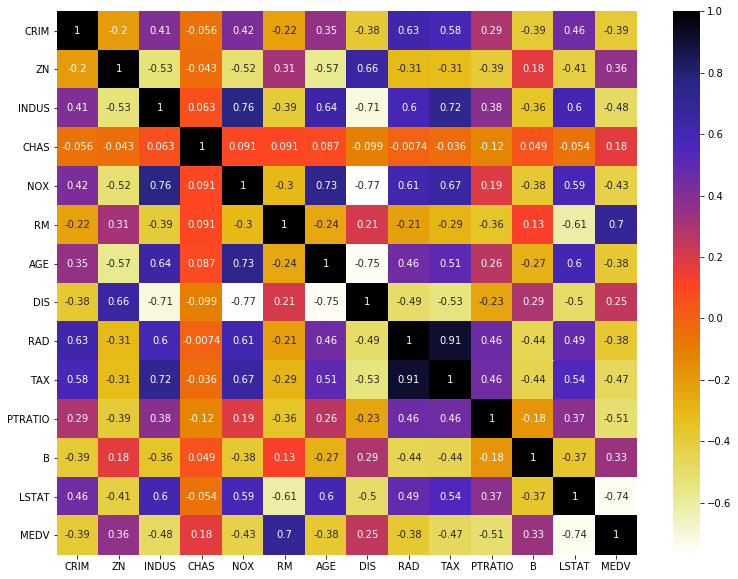

In [9]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(13,10))
# Badanie korelacji między X-ami, a Y-kiem, poniżej:
cor = df.corr() # było: cor = X_train.corr() - korelacja między zmiennymi objaśniającymi (X-ami)
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr() # było: corr_matrix = dataset.corr() - bez kolumny MEDV
    print(corr_matrix)
    for i in range(len(corr_matrix.columns)):
        print(i)
        for _ in range(i):
            if abs(corr_matrix.iloc[i, -1]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(X_train, 0.50)
len(set(corr_features))

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

4

In [12]:
corr_features

{'LSTAT', 'MEDV', 'PTRATIO', 'RM'}

In [13]:
corr_features.remove('MEDV')
corr_features

{'LSTAT', 'PTRATIO', 'RM'}

In [14]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,B
329,0.06724,0.0,3.24,0.0,0.460,17.2,5.2146,4.0,430.0,375.21
371,9.23230,0.0,18.10,0.0,0.631,100.0,1.1691,24.0,666.0,366.15
219,0.11425,0.0,13.89,1.0,0.550,92.4,3.3633,5.0,276.0,393.74
403,24.80170,0.0,18.10,0.0,0.693,96.0,1.7028,24.0,666.0,396.90
78,0.05646,0.0,12.83,0.0,0.437,53.7,5.0141,5.0,398.0,386.40
...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,0.458,54.2,6.0622,3.0,222.0,396.90
428,7.36711,0.0,18.10,0.0,0.679,78.1,1.9356,24.0,666.0,96.73
385,16.81180,0.0,18.10,0.0,0.700,98.1,1.4261,24.0,666.0,396.90
308,0.49298,0.0,9.90,0.0,0.544,82.5,3.3175,4.0,304.0,396.90


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['LSTAT','PTRATIO','RM']], df.MEDV, test_size=0.7, random_state=0)

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)
# Im wyższy tym lepszy
model.score(X_test,y_test)

0.6491283404286481

#### Wyniki pomiaru błędu predykcji:

In [17]:
# Im niższy tym lepszy
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

Mean squared error: 27.32


[-0.6061970642070058, -1.191885184046556, 4.534643935280652]

['LSTAT', 'PTRATIO', 'RM']

Empty DataFrame
Columns: []
Index: []

  Features
0    LSTAT
1  PTRATIO
2       RM

  Features  importance
0    LSTAT   -0.606197
1  PTRATIO   -1.191885
2       RM    4.534644

  Features  importance
1  PTRATIO   -1.191885
0    LSTAT   -0.606197
2       RM    4.534644

Check if there are positive values, if they are 'True' otherwise 'False'
1    False
0    False
2     True
Name: positive, dtype: bool


Text(0.5, 0, 'Importance')

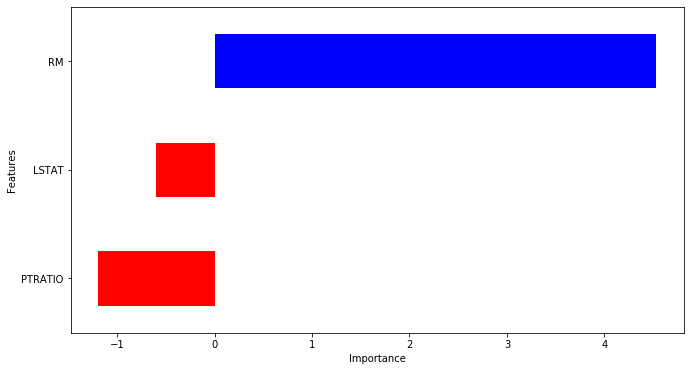

In [18]:
coeff = list(model.coef_)
print(coeff)
print()
labels = list(X_train.columns)
print(labels)
print()
features = pd.DataFrame()
print(features)
print()
features['Features'] = labels
print(features)
print()
features['importance'] = coeff
print(features)
print()
features.sort_values(by=['importance'], ascending=True, inplace=True)
print(features)
print()
features['positive'] = features['importance'] > 0
print("Check if there are positive values, if they are 'True' otherwise 'False'")
print(features['positive'])
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

# WNIOSKI:

Można zauważyć, że współczynnik regresji liniowej Importance stojący przy zmiennej zależnej x w równaniu y = b·x + b0. Jest ujemny dla ujemnych wynikór pomiaru jakości regresji, a dodatni dla dodatnich pomiarów jakości regresji. Wyniki pomiaru błędu predykcji określają, że średnio o 27.32[jednostek], mylę się w moich przewidywaniach. A współczynnik R^2 mówi mi o tym, że prawie 65% zmienności wariancji jest wyjaśniana przez mój model. Moje trzy zmienne, które tutaj uwzględniłem, czyli :['LSTAT', 'PTRATIO', 'RM']. One w 65% porcentach wyjaśniają całą zmienność mojego igreka['Y'] czyli ['MEDV'].